In [81]:
import numpy as numpy
from scipy import stats
import pandas as pd

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")

# Data Loading

In [82]:
path = "./ENB2012_data.xlsx" 
df = pd.read_excel(path)
df.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

In [83]:
df.columns = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Orientation",
    "Glazing_Area",
    "Glazing_Area_Distribution",
    "Heating_Load",
    "Cooling_Load",
]
df.head()

Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

# Preprocessing

In [84]:
df.describe()

Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000                    0.00000   
25%           3.50000     2.750000      0.100000                    1.75000   
50%           5.25000     3.500000      0.250000                    3.00000   
75%           7.00000     4.250000      0.400000                    4.00000   
max           7.00000     5.000000      0.400000                    5.00000   

       Heating_Load  Cooling_Load  
count    768.000000    768.000000  
mean      22.307195     24.587760  
std       10.090204      9.513306  
min        6.010000     10.900000  
25%       12.992500     15.620000  
50%       18.950000     22.080000  
75%       31.667500     33.132500  
max       43.100000     48.030000

In [85]:
# Orientation Î≥ÄÏàòÎäî 2, 3, 4, 5Ïùò ÎÑ§ Í∞ÄÏßÄ Í∞í(Î≤îÏ£ºÌòï Î≥ÄÏàò)ÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎ©∞, Í∞Å Í∞íÏù¥ ÎèôÏùºÌïú ÎπàÎèÑ(192Í∞ú)Î•º Í∞ñÎäîÎã§.
df["Orientation"].value_counts()

Orientation
2    192
3    192
4    192
5    192
Name: count, dtype: int64

In [86]:
# Glazing_Area_Distribution Î≥ÄÏàòÎäî 0Î∂ÄÌÑ∞ 5ÍπåÏßÄ Ï¥ù 6Í∞úÏùò Î≤îÏ£ºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎ©∞, Ïù¥ Ï§ë 1~5Î≤à Î≤îÏ£ºÎäî Í∞ÅÍ∞Å 144Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ Í∑†Ìòï Ïû°Ìûå Î∂ÑÌè¨Î•º Î≥¥Ïù∏Îã§.  
# Î∞òÎ©¥, 0Î≤à Î≤îÏ£ºÎäî Îã® 48Í∞úÎ°ú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ï†ÅÏùÄ ÏàòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÏúºÎ©∞, Ïù¥Îäî Î™®Îç∏ ÌïôÏäµ Ïãú Ìï¥Îãπ Î≤îÏ£ºÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä Î∂ÄÏ°±Ìï† Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.  
# ÌäπÌûà 0Î≤àÏùÄ Ïú†Î¶¨Ï∞ΩÏù¥ Ï†ÑÌòÄ ÏóÜÎäî Íµ¨Ï°∞Î•º ÎÇòÌÉÄÎÇº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏñ¥, Î∂ÑÏÑù Ïãú Ï£ºÏùò ÍπäÍ≤å Ìï¥ÏÑùÌï† ÌïÑÏöîÍ∞Ä ÏûàÎã§.
df["Glazing_Area_Distribution"].value_counts()

Glazing_Area_Distribution
1    144
2    144
3    144
4    144
5    144
0     48
Name: count, dtype: int64

# EDA: Í±¥Î¨º ÌäπÏÑ±Í≥º ÏóêÎÑàÏßÄ Ìö®Ïú®ÏÑ± Í∞ÑÏùò Í¥ÄÍ≥Ñ

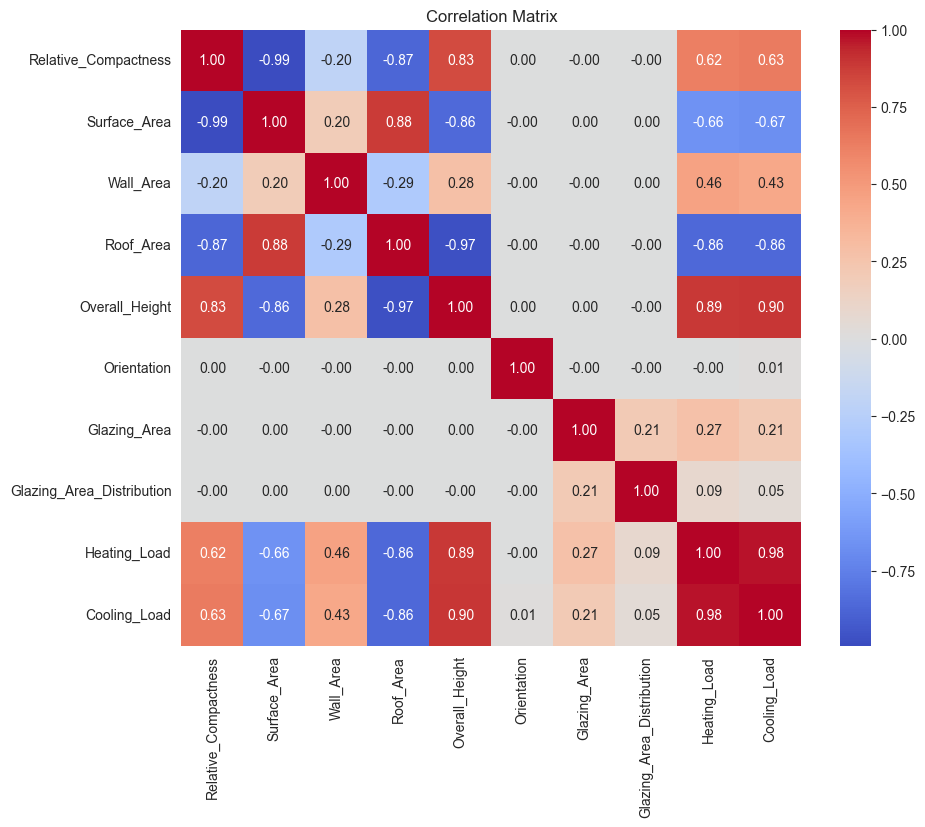

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Î™©Ï†Å
- Í±¥Î¨ºÏùò Íµ¨Ï°∞Ï†Å ÌäπÏÑ±Í≥º ÏóêÎÑàÏßÄ Ìö®Ïú®ÏÑ± Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌïòÏó¨, Ìñ•ÌõÑ ÏòàÏ∏° Î™®Îç∏ÏóêÏÑú Ï§ëÏöîÌïú ÎèÖÎ¶ΩÎ≥ÄÏàòÎ•º ÏÑ†Î≥ÑÌïòÍ∏∞ ÏúÑÌï®Ïù¥Îã§.

#### ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ Í≤∞Í≥º
- YÎ≥ÄÏàò (`Heating_Load`, `Cooling_Load`)ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Ï§Ä Ï£ºÏöî Î≥ÄÏàò:

| Feature                  | Heating_Load | Cooling_Load | Interpretation           |
|--------------------------|--------------|---------------|--------------------------|
| Relative_Compactness     | **+0.62**     | **+0.63**      | Îã§ÏÜå Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ |
| Surface_Area             | **‚àí0.66**     | **‚àí0.67**      | Îã§ÏÜå Í∞ïÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ |
| Wall_Area                | +0.46         | +0.43          | Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ |
| Roof_Area                | **‚àí0.86**     | **‚àí0.86**      | Îß§Ïö∞ Í∞ïÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ |
| Overall_Height           | **+0.89**     | **+0.90**      | Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ |

#### ÏòÅÌñ•Ïù¥ Ï†ÅÏùÄ Î≥ÄÏàòÎì§
- `Orientation`, `Glazing_Area`, `Glazing_Area_Distribution`Îäî Îëê YÍ∞íÍ≥ºÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏõå ÏòàÏ∏° Î™®Îç∏ÏóêÏÑúÏùò ÏòÅÌñ•Î†•Ïù¥ ÎÇÆÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.

#### Ï†ïÎ¶¨
- **Overall_Height**: ÎÇúÎ∞©/ÎÉâÎ∞© Î∂ÄÌïòÏóê Í∞ÄÏû• ÌÅ∞ ÏñëÏùò ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàò
- **Roof_Area**: Îëê target Î™®ÎëêÏóê ÏùåÏùò ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÌäπÏÑ±
- **Relative_Compactness**: Î∂ÄÌïò ÏòàÏ∏°Ïóê ÏïàÏ†ïÏ†ÅÏù¥Í≥† ÏùòÎØ∏ ÏûàÎäî ÏòÅÌñ•Î†•ÏùÑ Î≥¥Ïù∏Îã§.

/Users/dobby/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dobby/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dobby/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dobby/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dobby/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54980 (\N{HANGUL 

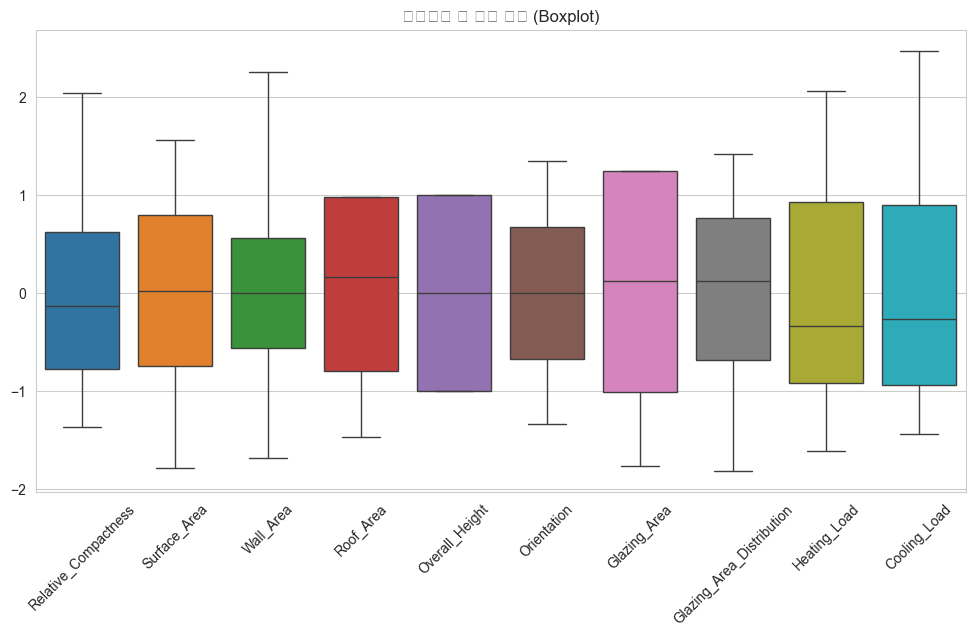

In [ ]:
# ÌëúÏ§ÄÌôî Ï†Ñ Î≥ÄÏàòÎì§Ïùò Îã®ÏúÑ Ï∞®Ïù¥Î•º Ï†úÍ±∞ÌïòÍ≥† Î∂ÑÌè¨Î•º Î≥¥Í∏∞ ÏúÑÌïú boxplot
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

plt.figure(figsize=(12, 6))
sns.boxplot(df_scaled)
plt.xticks(rotation=45)
plt.title("Ïä§ÏºÄÏùºÎßÅ ÌõÑ Î≥ÄÏàò Î∂ÑÌè¨ (Boxplot)")
plt.show()

### BoxplotÏùÑ ÌÜµÌïú Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏

- ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Í∑∏ÎåÄÎ°ú boxplotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÎ©¥ Î≥ÄÏàò Í∞Ñ Ïä§ÏºÄÏùº Ï∞®Ïù¥ ÎïåÎ¨∏Ïóê ÎåÄÎ∂ÄÎ∂ÑÏùò Î≥ÄÏàòÍ∞Ä 0 Í∑ºÏ≤òÏóê ÎàåÎ†§ Î≥¥Ïù¥Í≤å ÎêúÎã§.
- Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ `StandardScaler`Î•º Ï†ÅÏö©ÌïòÏó¨ Í∞Å Î≥ÄÏàòÏùò ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Ï†ïÍ∑úÌôîÌïú ÌõÑ ÏãúÍ∞ÅÌôîÌïòÏòÄÎã§.
- Ïä§ÏºÄÏùºÎßÅ ÌõÑ boxplotÏóêÏÑúÎäî Ïù¥ÏÉÅÏπòÏôÄ Î∂ÑÌè¨Ïùò ÏôúÍ≥° Ïó¨Î∂ÄÎ•º Î≥ÄÏàòÎ≥ÑÎ°ú ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌååÏïÖÌï† Ïàò ÏûàÎã§.

<Figure size 1200x1000 with 0 Axes>

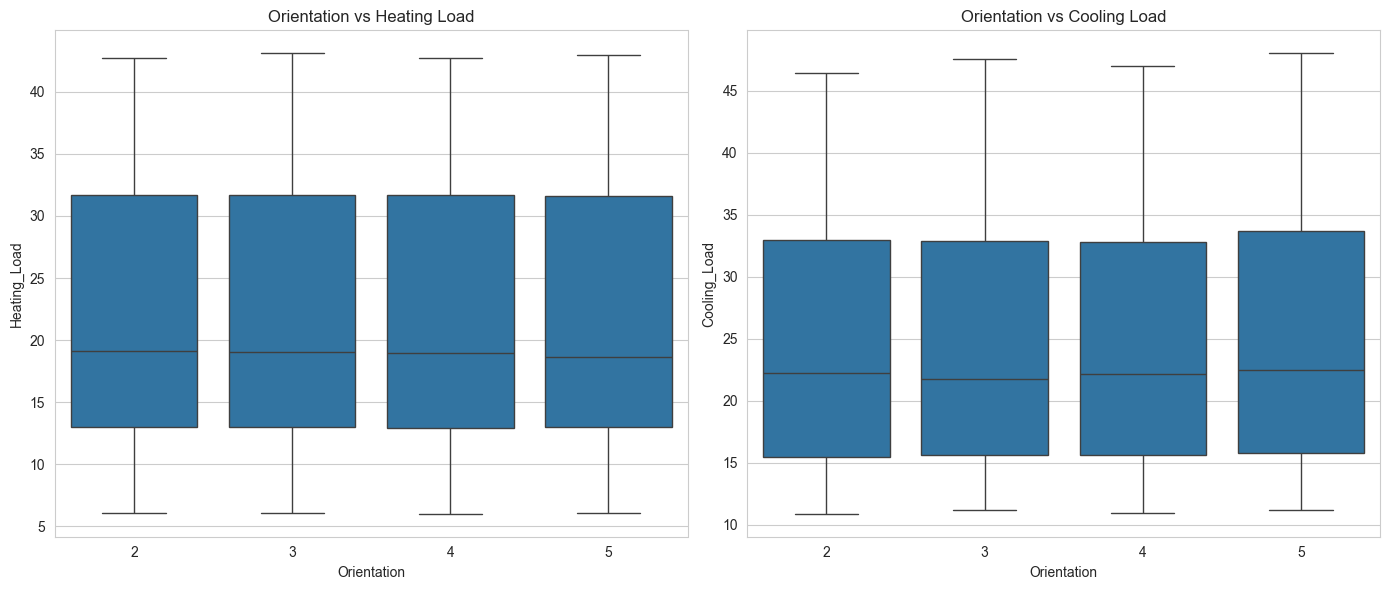

In [88]:
# ÌÉÄÍ≤üÎ≥Ñ Boxplot (Î≤îÏ£ºÌòï vs Ïó∞ÏÜçÌòï)
# ÌäπÏ†ï Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê Îî∞Îùº ÏóêÎÑàÏßÄ Î∂ÄÌïòÍ∞Ä Ïñ¥ÎñªÍ≤å Îã§Î•∏ÏßÄ ÎπÑÍµê
plt.figure(figsize=(12, 10))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.boxplot(data=df, x="Orientation", y="Heating_Load", ax=ax[0])
ax[0].set_title("Orientation vs Heating Load")
sns.boxplot(data=df, x="Orientation", y="Cooling_Load", ax=ax[1])
ax[1].set_title("Orientation vs Cooling Load")
plt.tight_layout()
plt.show()

- OrientationÏóê Îî∞Î•∏ Heating_LoadÏôÄ Cooling_Load Î∂ÑÌè¨Î•º ÎπÑÍµêÌïú Í≤∞Í≥º, Î∞©Ìñ•Ïóê Îî∞Î•∏ Î∂ÄÌïò Ï∞®Ïù¥Îäî ÌÅ¨ÏßÄ ÏïäÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- Ïù¥Îäî ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥ºÏóêÏÑúÎèÑ Orientation Î≥ÄÏàòÏôÄ ÌÉÄÍ≤ü Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÏù¥ Í±∞Ïùò ÏóÜÏóàÎçò Í≤ÉÍ≥º ÏùºÏπòÌïúÎã§.

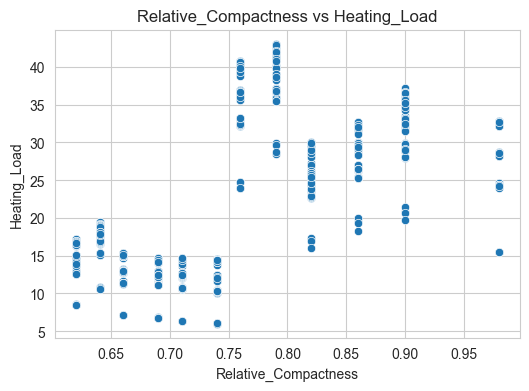

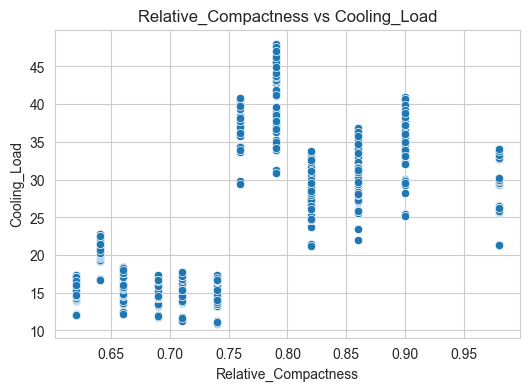

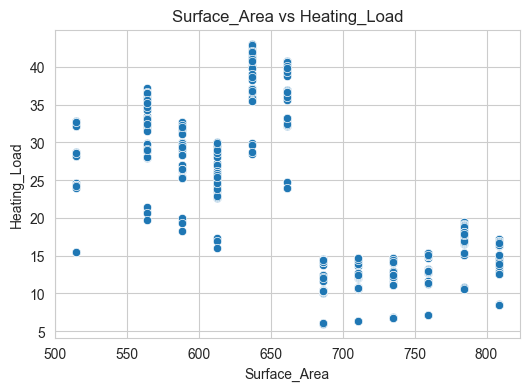

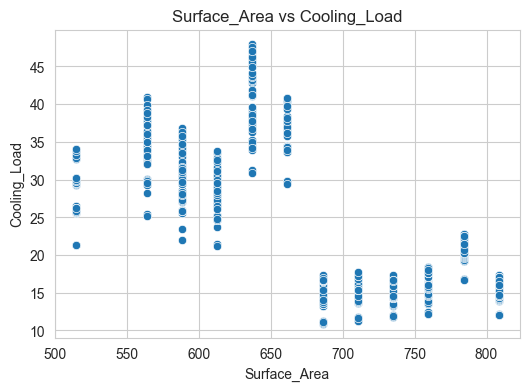

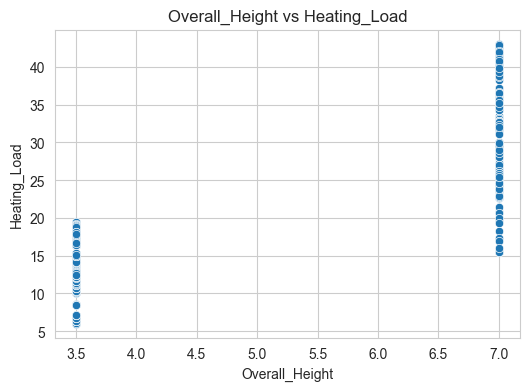

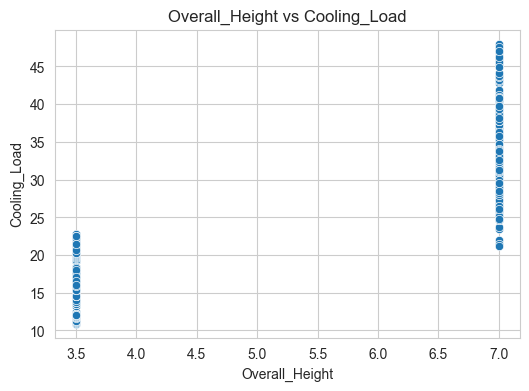

In [92]:
# ÌÉÄÍ≤üÎ≥Ñ Scatter Plot (Ïó∞ÏÜçÌòï vs ÌÉÄÍ≤ü)
# Ï§ëÏöî Î≥ÄÏàòÎì§Í≥º ÌÉÄÍ≤ü(ÎÇúÎ∞©/ÎÉâÎ∞© Î∂ÄÌïò) Í∞ÑÏùò Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî
# Ìï¥Îãπ Î≥ÄÏàò(key_features)Îì§ÏùÄ Heating_Load, Cooling_LoadÏôÄÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï†àÎåìÍ∞íÏù¥ 0.6 Ïù¥ÏÉÅÏúºÎ°ú, Î∂ÄÌïò(Load)Ïóê ÏùòÎØ∏ ÏûàÎäî ÏòÅÌñ•ÏùÑ Ï§ÄÎã§.

key_features = ["Relative_Compactness", "Surface_Area", "Overall_Height"]
target_vars = ["Heating_Load", "Cooling_Load"]

for feature in key_features:
    for target in target_vars:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=feature, y=target)
        plt.title(f"{feature} vs {target}")
        plt.show()

- Relative_CompactnessÎäî Heating_Load Î∞è Cooling_LoadÏôÄ Î™®Îëê Í∞ïÌïú ÏùåÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.
- Overall_HeightÎäî Îëê ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ ÏñëÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§.
- Ïù¥Îäî ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏ÎßµÏóêÏÑú Í¥ÄÏ∞∞Îêú Í¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°úÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

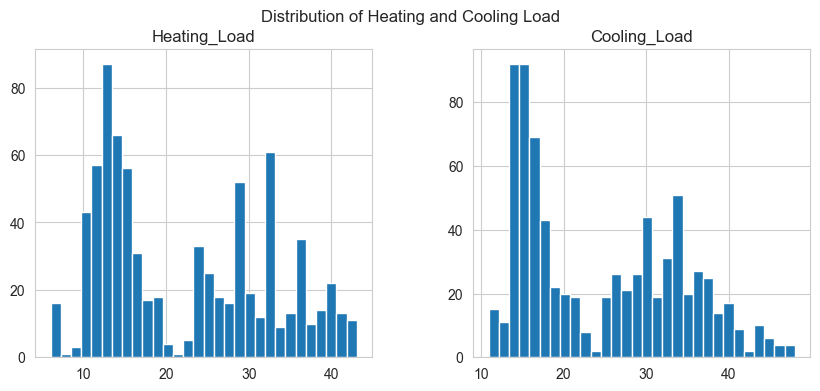

In [70]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÎòêÎäî KDE (Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî)
# Î≥ÄÏàò Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÏó¨ ÏôúÎèÑ(Skewness)ÎÇò Ïù¥ÏÉÅÏπò ÌåêÎã®
df[["Heating_Load", "Cooling_Load"]].hist(bins=30, figsize=(10, 4))
plt.suptitle("Distribution of Heating and Cooling Load")
plt.show()

### ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÌè¨ Ìï¥ÏÑù

#### Heating_Load

- Heating_Load Î≥ÄÏàòÎäî Ï£ºÎ°ú **10~20 ÏÇ¨Ïù¥**Ïóê Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏúºÎ©∞, Ïù¥ Íµ¨Í∞ÑÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÄÏû• Î∞ÄÏßëÎêòÏñ¥ ÏûàÎã§.  
- Í∑∏Îü¨ÎÇò 30 Ïù¥ÏÉÅÏùò Í∞íÎì§ÎèÑ ÏùºÏ†ï ÎπÑÏú® Ï°¥Ïû¨ÌïòÏó¨, Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú **Ïò§Î•∏Ï™Ω Íº¨Î¶¨Í∞Ä Í∏¥ ÎπÑÎåÄÏπ≠ Î∂ÑÌè¨**Î•º Î≥¥Ïù∏Îã§.  
- Ïù¥Îäî Ìï¥Îãπ Î≥ÄÏàòÏùò Î∂ÑÌè¨Í∞Ä **Ïö∞Ï∏° ÏôúÎèÑ(Positive Skewness)**Î•º Í∞ÄÏßÄÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.  
- Îî∞ÎùºÏÑú Heating_LoadÎäî **Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÏúºÎ©∞**, Ïù¥ÏÉÅÍ∞í(outlier)Ïùò Ï°¥Ïû¨ Í∞ÄÎä•ÏÑ±ÎèÑ Í≥†Î†§Ìï¥Ïïº ÌïúÎã§.

#### Cooling_Load

- Cooling_Load Î≥ÄÏàò Ïó≠Ïãú **10~20 ÏÇ¨Ïù¥**Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßëÏ§ëÎêòÏñ¥ ÏûàÏúºÎ©∞, Heating_LoadÏôÄ Ïú†ÏÇ¨Ìïú Î∂ÑÌè¨ Í≤ΩÌñ•ÏùÑ Î≥¥Ïù∏Îã§.  
- ÌïòÏßÄÎßå Heating_LoadÎ≥¥Îã§ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú **Î∂ÑÏÇ∞Ïù¥ Îçî ÌÅ¨Î©∞**, **30~40 ÏÇ¨Ïù¥**Ïùò Íµ¨Í∞ÑÏóêÎèÑ ÎπàÎèÑÏàòÍ∞Ä ÎßéÏùÄ ÌäπÏßïÏùÑ Í∞ÄÏßÑÎã§.  
- Î∂ÑÌè¨ ÌòïÌÉúÎäî **Ïù¥Ï§ë Î¥âÏö∞Î¶¨(bimodal)**ÏôÄ Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ°ú Ìï¥ÏÑùÎê† Ïàò ÏûàÏúºÎ©∞, ÏïΩÌïú Ïö∞Ï∏° ÏôúÎèÑ ÎòêÌïú Ï°¥Ïû¨ÌïúÎã§.  
- Cooling_Load ÎòêÌïú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÏôÑÏ†ÑÌûà Îî∞Î•¥ÏßÄ ÏïäÏúºÎ©∞, **ÎπÑÎåÄÏπ≠ÏÑ±Í≥º Î∂ÑÏÇ∞ ÌäπÏÑ±**ÏùÑ Í≥†Î†§ÌïòÏó¨ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Íµ¨ÏÑ±Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§.

# Modeling

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [41]:
# Î≥ÄÏàò Î∂ÑÎ¶¨
X = df.drop(columns=["Heating_Load", "Cooling_Load"])
Y1 = df["Heating_Load"]
Y2 = df["Cooling_Load"]

In [ ]:
# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# train/test Î∂ÑÎ¶¨
# X, Y1, Y2Î•º Î™®Îëê train/testÎ°ú ÎÇòÎàÑÍ∏∞
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(
    X_scaled, Y1, Y2, test_size=0.2, random_state=42
)

In [48]:
# 4. Model 1: Heating_Load
model_Y1 = LinearRegression()
model_Y1.fit(X_train, Y1_train)
Y1_pred_train = model_Y1.predict(X_train)
Y1_pred_test = model_Y1.predict(X_test)

In [ ]:
# 5. Model 2: Cooling_Load (Chained)
X_train_chained = np.hstack([X_train, Y1_pred_train.reshape(-1, 1)])
X_test_chained = np.hstack([X_test, Y1_pred_test.reshape(-1, 1)])

model_Y2 = LinearRegression()
model_Y2.fit(X_train_chained, Y2_train)
Y2_pred_test = model_Y2.predict(X_test_chained)

In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Heating_Load ÌèâÍ∞Ä
print("Heating_Load Î™®Îç∏ ÏÑ±Îä•")
print(f"Train R¬≤: {r2_score(Y1_train, Y1_pred_train):.3f}")
print(f"Train MAE: {mean_absolute_error(Y1_train, Y1_pred_train):.2f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(Y1_train, Y1_pred_train)):.2f}")
print(f"Train MAPE: {mean_absolute_percentage_error(Y1_train, Y1_pred_train):.2f}%")

print(f"Test R¬≤: {r2_score(Y1_test, Y1_pred_test):.3f}")
print(f"Test MAE: {mean_absolute_error(Y1_test, Y1_pred_test):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(Y1_test, Y1_pred_test)):.2f}")
print(f"Test MAPE: {mean_absolute_percentage_error(Y1_test, Y1_pred_test):.2f}%")

Heating_Load Î™®Îç∏ ÏÑ±Îä•
Train R¬≤: 0.916
Train MAE: 2.06
Train RMSE: 2.91
Train MAPE: 9.68%
Test R¬≤: 0.912
Test MAE: 2.18
Test RMSE: 3.04
Test MAPE: 10.15%


In [61]:
# Cooling_Load ÌèâÍ∞Ä
print("Cooling_Load Î™®Îç∏ ÏÑ±Îä•")
Y2_pred_train = model_Y2.predict(X_train_chained)  # ÏòàÏ∏°Í∞í Ï†ÄÏû•

print(f"Train R¬≤: {r2_score(Y2_train, Y2_pred_train):.3f}")
print(f"Train MAE: {mean_absolute_error(Y2_train, Y2_pred_train):.2f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(Y2_train, Y2_pred_train)):.2f}")
print(f"Train MAPE: {mean_absolute_percentage_error(Y2_train, Y2_pred_train):.2f}%")

print(f"Test R¬≤: {r2_score(Y2_test, y2_pred_test):.3f}")
print(f"Test MAE: {mean_absolute_error(Y2_test, y2_pred_test):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(Y2_test, y2_pred_test)):.2f}")
print(f"Test MAPE: {mean_absolute_percentage_error(Y2_test, y2_pred_test):.2f}%")

Cooling_Load Î™®Îç∏ ÏÑ±Îä•
Train R¬≤: 0.887
Train MAE: 2.25
Train RMSE: 3.19
Train MAPE: 8.98%
Test R¬≤: 0.894
Test MAE: 2.21
Test RMSE: 3.13
Test MAPE: 8.56%


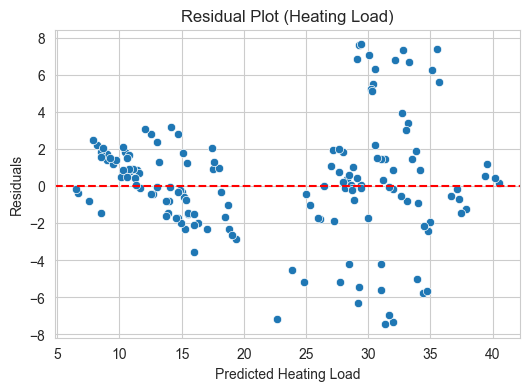

In [ ]:
# ÏûîÏ∞®(residual) ÌîåÎ°Ø (Î™®Îç∏ ÌèâÍ∞Ä)
# Î™®Îç∏Ïù¥ ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑú ÏòàÏ∏°ÏùÑ Í≥ºÏÜåÌïòÍ±∞ÎÇò Í≥ºÎåÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎäîÏßÄ Î≥¥Í∏∞ ÏúÑÌï¥
residuals = Y1_test - Y1_pred_test
plt.figure(figsize=(6, 4))
sns.scatterplot(x=Y1_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Heating Load")
plt.ylabel("Residuals")
plt.title("Residual Plot (Heating Load)")
plt.show()

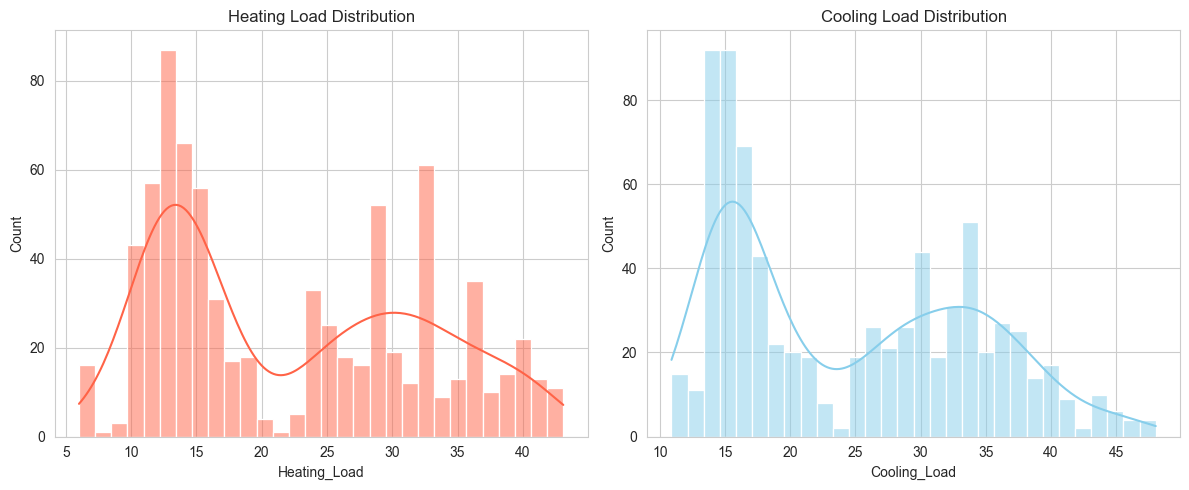

In [72]:
# ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Heating_LoadÏôÄ Cooling_Load Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Heating_Load"], kde=True, bins=30, color="tomato")
plt.title("Heating Load Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["Cooling_Load"], kde=True, bins=30, color="skyblue")
plt.title("Cooling Load Distribution")

plt.tight_layout()
plt.show()

### ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏ (ÌûàÏä§ÌÜ†Í∑∏Îû®)

ÎÇúÎ∞© Î∂ÄÌïò(Heating Load)ÏôÄ ÎÉâÎ∞© Î∂ÄÌïò(Cooling Load)Ïùò Î∂ÑÌè¨Î•º ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥º,  
Îëê Î≥ÄÏàò Î™®Îëê ÎπÑÍµêÏ†Å Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ ÌòïÌÉúÎ•º Î≥¥Ïù¥Î©∞, Î™®Îç∏ÎßÅÏóê Ï†ÅÌï©Ìïú Î∂ÑÌè¨ ÌäπÏÑ±ÏùÑ Í∞ÄÏßêÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.  
Îã§Îßå Heating LoadÏùò Í≤ΩÏö∞ ÏïΩÍ∞ÑÏùò Ïò§Î•∏Ï™Ω Íº¨Î¶¨(tail)Í∞Ä Ï°¥Ïû¨ÌïúÎã§.

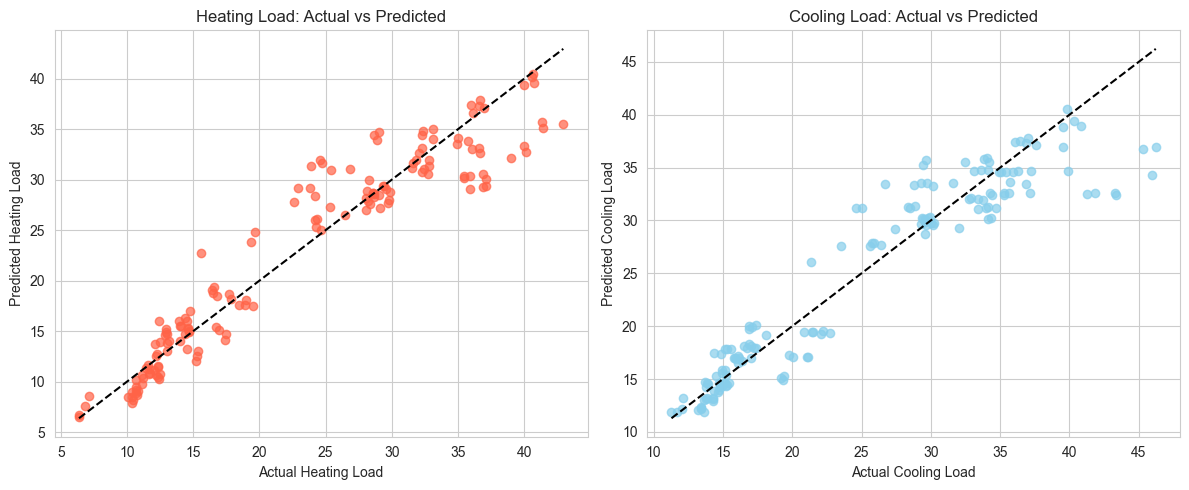

In [74]:
# ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í ÎπÑÍµê (ÏÇ∞Ï†êÎèÑ plot)
plt.figure(figsize=(12, 5))

# Heating_Load
plt.subplot(1, 2, 1)
plt.scatter(Y1_test, Y1_pred_test, alpha=0.7, color="tomato")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Heating Load: Actual vs Predicted")
plt.plot([Y1_test.min(), Y1_test.max()], [Y1_test.min(), Y1_test.max()], 'k--')

# Cooling_Load
plt.subplot(1, 2, 2)
plt.scatter(Y2_test, y2_pred_test, alpha=0.7, color="skyblue")
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Cooling Load: Actual vs Predicted")
plt.plot([Y2_test.min(), Y2_test.max()], [Y2_test.min(), Y2_test.max()], 'k--')

plt.tight_layout()
plt.show()

### ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í ÏãúÍ∞ÅÌôî

Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÎÇúÎ∞© Î∞è ÎÉâÎ∞© Î∂ÄÌïò Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùÑ ÏÇ∞Ï†êÎèÑÎ°ú ÎπÑÍµêÌïú Í≤∞Í≥º, ÎåÄÎ∂ÄÎ∂ÑÏùò Ï†êÎì§Ïù¥ Í∏∞Ï§ÄÏÑ†(y=x)Ïóê Í∑ºÏ†ëÌï¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.  
Ïù¥Îäî Î™®Îç∏Ïù¥ ÌÉÄÍ≤ü Í∞íÏùÑ ÎπÑÍµêÏ†Å Ï†ïÌôïÌûà ÏòàÏ∏°ÌïòÍ≥† ÏûàÏùåÏùÑ ÏùòÎØ∏ÌïúÎã§.

## Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä

Í∞Å Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•(R¬≤)Í≥º Ïò§Ï∞®(MAE, RMSE, MAPE)Î•º Í∏∞Ï§ÄÏúºÎ°ú **ÎÇúÎ∞© Î∂ÄÌïò(Heating Load)**ÏôÄ **ÎÉâÎ∞© Î∂ÄÌïò(Cooling Load)** ÏòàÏ∏° ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÏòÄÎã§.

#### üìå ÌèâÍ∞Ä ÏßÄÌëú ÏÑ§Î™Ö
- **R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò)**: Î™®Îç∏Ïù¥ Ïã§Ï†úÍ∞íÏùÑ ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÌïòÎäîÏßÄ ÎÇòÌÉÄÎÉÑ. 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌï®.
- **MAE (Mean Absolute Error)**: ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®. Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï†ïÌôïÌïú ÏòàÏ∏°ÏùÑ ÏùòÎØ∏Ìï®.
- **RMSE (Root Mean Squared Error)**: Ï†úÍ≥± ÌèâÍ∑† Ïò§Ï∞®Ïùò Ï†úÍ≥±Í∑ºÏúºÎ°ú, Ïù¥ÏÉÅÏπòÏóê ÎØºÍ∞êÌï®.
- **MAPE (Mean Absolute Percentage Error)**: ÏòàÏ∏°Í∞íÏù¥ Ïã§Ï†úÍ∞íÏóê ÎåÄÌï¥ ÌèâÍ∑†Ï†ÅÏúºÎ°ú Î™á %Ïùò Ïò§Ï∞®Î•º Í∞ÄÏßÄÎäîÏßÄ ÎÇòÌÉÄÎÉÑ. Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï†ïÌôïÌï®.

---

### Î™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ

| Target         | Íµ¨Î∂Ñ     | R¬≤     | MAE   | RMSE  | MAPE (%) |
|----------------|----------|--------|-------|--------|-----------|
| Heating Load   | Train    | 0.916  | 2.06  | 2.91   | 9.68      |
|                | Test     | 0.912  | 2.18  | 3.04   | 10.15     |
| Cooling Load   | Train    | 0.887  | 2.25  | 3.19   | 8.98      |
|                | Test     | 0.894  | 2.21  | 3.13   | 8.56      |
---

### Ìï¥ÏÑù

- **Heating Load ÏòàÏ∏° Î™®Îç∏**ÏùÄ R¬≤ Í∞íÏù¥ ÎÜíÍ≥† MAE, RMSE, MAPE Í∞íÏù¥ ÎÇÆÏïÑ, **ÏÑ§Î™ÖÎ†•Í≥º ÏòàÏ∏° Ï†ïÌôïÎèÑ Î™®Îëê Ïö∞Ïàò**Ìïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ.
- **Cooling Load ÏòàÏ∏° Î™®Îç∏**ÏùÄ **ÎÇúÎ∞© Î∂ÄÌïò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï∂îÍ∞Ä ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìïú Chained Prediction(Ïó∞ÏáÑ ÏòàÏ∏°) Íµ¨Ï°∞**Î•º Ï†ÅÏö©ÌïòÏó¨, Îëê Î™©Ìëú Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏùºÎ∂Ä Î∞òÏòÅÌï† Ïàò ÏûàÏóàÏùå.
- Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îëê Î™®Îç∏ Î™®Îëê **ÌöåÍ∑Ä Í∏∞Î∞ò Î™®Îç∏Î°úÏÑú ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä•**ÏùÑ Î≥¥Ïù¥Î©∞, ÏóêÎÑàÏßÄ Ìö®Ïú®ÏÑ± ÏòàÏ∏°Ïóê ÌôúÏö© Í∞ÄÎä•Ìï®ÏùÑ ÌôïÏù∏Ìï®.

# End of Documents